In [1]:
"""
================================================================================
INICIAÇÃO CIENTÍFICA - ANÁLISE DE SINAIS sEMG (Eletromiografia de Superfície)
================================================================================
Aluno: Anderson Rafael da Silva Lesniewski
RA: 1991329
Orientador: Dr Fabio Luiz Bertotti
Data: Outubro 2025

Este notebook contém 5 sinais sEMG simulados com diferentes características,
demonstrando conceitos fundamentais de processamento de sinais biomédicos.
================================================================================
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.fft import fft, fftfreq

# Configuração para melhorar visualização dos gráficos
plt.rcParams['figure.figsize'] = (12, 4)
plt.rcParams['font.size'] = 10

print("="*80)
print(" ANÁLISE DE 5 SINAIS sEMG SIMULADOS")
print("="*80)
print()

 ANÁLISE DE 5 SINAIS sEMG SIMULADOS




SINAL 1: CONTRAÇÃO MUSCULAR INTERMITENTE


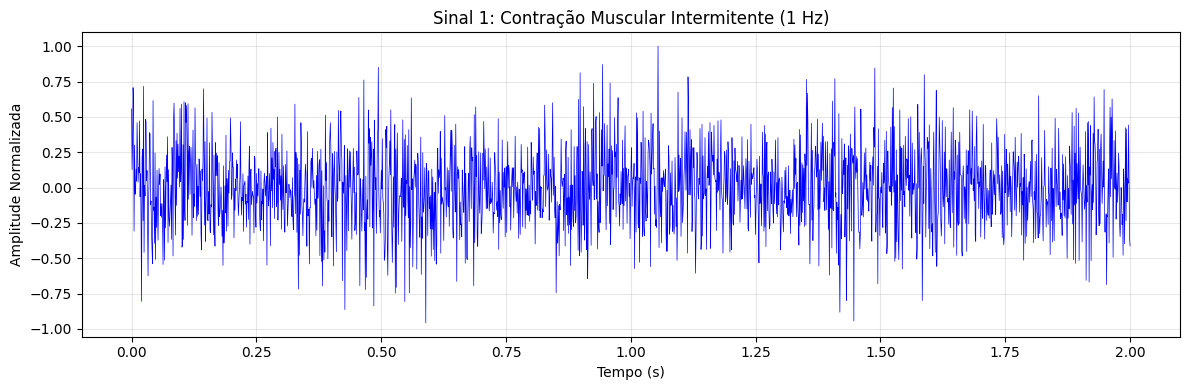

Características:
   • Frequência de contração: 1 Hz (1 vez por segundo)
   • Amplitude: Normalizada entre -1 e 1
   • Duração: 2 segundos
   • Simula: Exercício de contração lenta (ex: levantamento de peso controlado)


In [2]:
# ============================================================================
# SINAL 1: Contração Muscular Intermitente (Baixa Frequência)
# ============================================================================
print("\n" + "="*80)
print("SINAL 1: CONTRAÇÃO MUSCULAR INTERMITENTE")
print("="*80)

# Parâmetros do sinal
fs = 1000  # Taxa de amostragem: 1000 Hz (padrão para EMG)
t = np.linspace(0, 2, fs * 2)  # Vetor de tempo: 0 a 2 segundos

# Gerando ruído branco gaussiano (base do sinal EMG)
np.random.seed(0)  # Garante reprodutibilidade
noise = np.random.randn(len(t))  # 2000 amostras de ruído

# Modulando o ruído para simular contrações de 1 Hz
# A função sin^8 cria "pulsos" que representam ativações musculares
emg1 = noise * np.exp(-0.5 * (np.sin(2 * np.pi * 1 * t) ** 8))

# Normalizando para amplitude entre -1 e 1
emg1 = emg1 / np.max(np.abs(emg1))

# Visualização do sinal no domínio do tempo
plt.figure(figsize=(12, 4))
plt.plot(t, emg1, linewidth=0.5, color='blue')
plt.title("Sinal 1: Contração Muscular Intermitente (1 Hz)")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude Normalizada")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Características:")
print("   • Frequência de contração: 1 Hz (1 vez por segundo)")
print("   • Amplitude: Normalizada entre -1 e 1")
print("   • Duração: 2 segundos")
print("   • Simula: Exercício de contração lenta (ex: levantamento de peso controlado)")


SINAL 2: CONTRAÇÃO SUSTENTADA COM FADIGA MUSCULAR


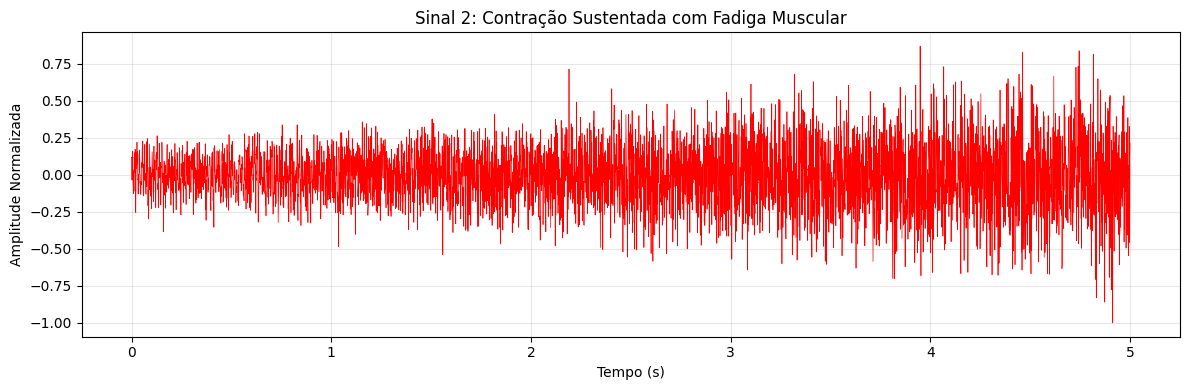

Características:
   • Duração: 5 segundos de contração contínua
   • Amplitude: Aumenta com o tempo (recrutamento de mais fibras)
   • Frequência: Shift para frequências mais baixas (fadiga)
   • Simula: Manutenção de postura estática ou isometria prolongada


In [3]:
# ============================================================================
# SINAL 2: Contração Sustentada com Fadiga Muscular
# ============================================================================
print("\n" + "="*80)
print("SINAL 2: CONTRAÇÃO SUSTENTADA COM FADIGA MUSCULAR")
print("="*80)

# Vetor de tempo mais longo para observar fadiga
t2 = np.linspace(0, 5, fs * 5)  # 5 segundos

# Gerando ruído base
np.random.seed(10)
noise2 = np.random.randn(len(t2))

# Simulando fadiga: amplitude aumenta e frequência mediana diminui com o tempo
# Fenômeno real: quando o músculo cansa, recruta mais unidades motoras
fadiga = 1 + 0.5 * t2  # Aumento linear da amplitude (fadiga)
freq_shift = np.sin(2 * np.pi * 80 * t2) * np.exp(-0.3 * t2)  # Shift de frequência

emg2 = noise2 * fadiga * 0.3 + freq_shift * 0.4

# Normalizando
emg2 = emg2 / np.max(np.abs(emg2))

# Visualização
plt.figure(figsize=(12, 4))
plt.plot(t2, emg2, linewidth=0.5, color='red')
plt.title("Sinal 2: Contração Sustentada com Fadiga Muscular")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude Normalizada")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Características:")
print("   • Duração: 5 segundos de contração contínua")
print("   • Amplitude: Aumenta com o tempo (recrutamento de mais fibras)")
print("   • Frequência: Shift para frequências mais baixas (fadiga)")
print("   • Simula: Manutenção de postura estática ou isometria prolongada")


SINAL 3: CONTRAÇÃO RÁPIDA E EXPLOSIVA


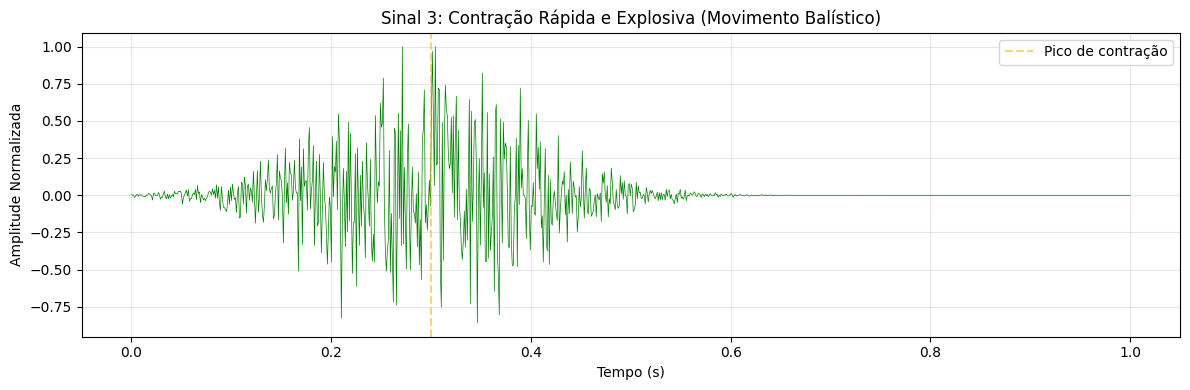

Características:
   • Duração: ~200-300 ms (movimento balístico)
   • Amplitude: Muito alta (contração máxima)
   • Padrão: Pulso único e intenso
   • Simula: Salto, chute, soco, ou qualquer movimento explosivo


In [4]:
# ============================================================================
# SINAL 3: Contração Rápida e Explosiva (Alta Frequência)
# ============================================================================
print("\n" + "="*80)
print("SINAL 3: CONTRAÇÃO RÁPIDA E EXPLOSIVA")
print("="*80)

# Vetor de tempo curto (movimento rápido)
t3 = np.linspace(0, 1, fs)  # 1 segundo

# Gerando sinal de alta amplitude e curta duração
np.random.seed(20)
noise3 = np.random.randn(len(t3))

# Pulso explosivo: envelope gaussiano
centro = 0.3  # Pico em 0.3 segundos
largura = 0.1  # Duração curta
envelope = np.exp(-((t3 - centro) ** 2) / (2 * largura ** 2))

emg3 = noise3 * envelope * 3  # Amplitude alta

# Normalizando
emg3 = emg3 / np.max(np.abs(emg3))

# Visualização
plt.figure(figsize=(12, 4))
plt.plot(t3, emg3, linewidth=0.5, color='green')
plt.title("Sinal 3: Contração Rápida e Explosiva (Movimento Balístico)")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude Normalizada")
plt.grid(True, alpha=0.3)
plt.axvline(x=centro, color='orange', linestyle='--', alpha=0.5, label='Pico de contração')
plt.legend()
plt.tight_layout()
plt.show()

print("Características:")
print("   • Duração: ~200-300 ms (movimento balístico)")
print("   • Amplitude: Muito alta (contração máxima)")
print("   • Padrão: Pulso único e intenso")
print("   • Simula: Salto, chute, soco, ou qualquer movimento explosivo")


SINAL 4: FILTRAGEM DE ARTEFATOS (ANTES E DEPOIS)


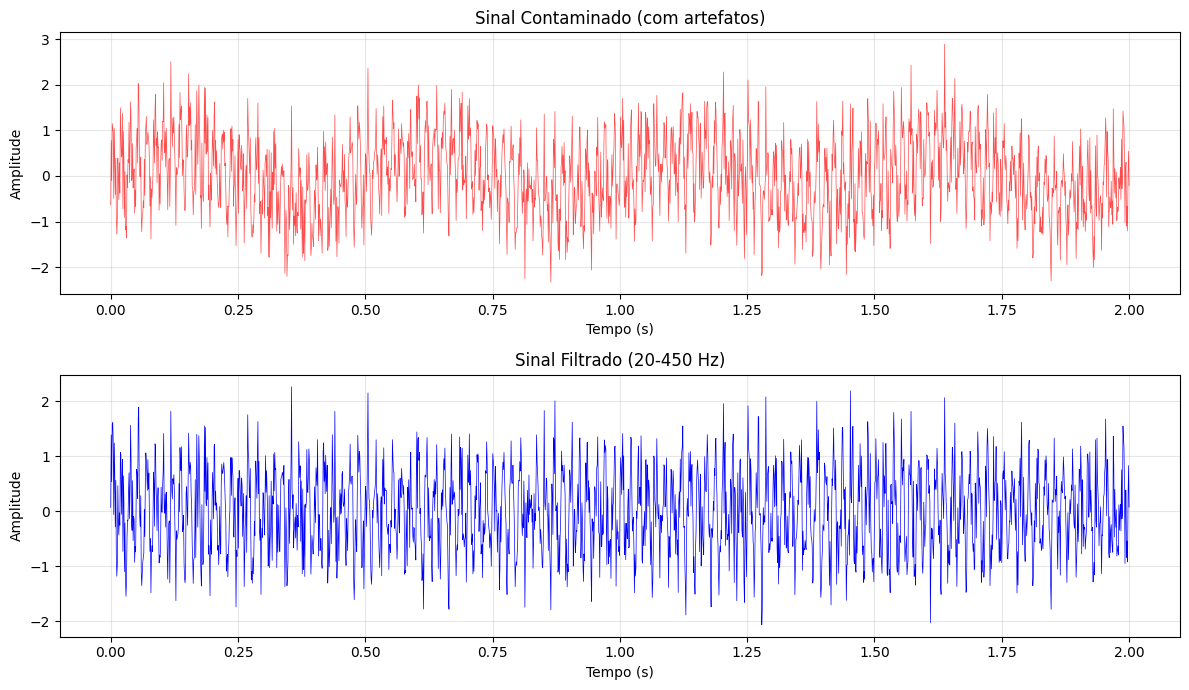

Artefatos removidos:
   • Ruído da rede elétrica: 60 Hz (componente DC)
   • Artefato de movimento: < 20 Hz (baixa frequência)
   • Ruído eletrônico: > 450 Hz (alta frequência)
   • Faixa útil mantida: 20-450 Hz (onde está o sinal EMG real)


In [5]:
# ============================================================================
# SINAL 4: Sinal EMG com Artefatos e Filtragem
# ============================================================================
print("\n" + "="*80)
print("SINAL 4: FILTRAGEM DE ARTEFATOS (ANTES E DEPOIS)")
print("="*80)

# Criando sinal EMG "limpo"
t4 = np.linspace(0, 2, fs * 2)
np.random.seed(30)
emg_limpo = np.random.randn(len(t4)) * 0.5

# Adicionando artefatos comuns:
# 1. Ruído da rede elétrica (60 Hz no Brasil)
ruido_rede = 0.8 * np.sin(2 * np.pi * 60 * t4)

# 2. Artefato de movimento (baixa frequência)
artefato_movimento = 0.5 * np.sin(2 * np.pi * 2 * t4)

# 3. Ruído de alta frequência
ruido_alta_freq = 0.3 * np.sin(2 * np.pi * 800 * t4)

# Sinal contaminado
emg4_contaminado = emg_limpo + ruido_rede + artefato_movimento + ruido_alta_freq

# Função para criar filtro passa-banda Butterworth
def butter_bandpass(lowcut, highcut, fs, order=4):
    """
    Cria um filtro passa-banda Butterworth.
    
    Parâmetros:
    - lowcut: frequência de corte inferior (Hz)
    - highcut: frequência de corte superior (Hz)
    - fs: taxa de amostragem (Hz)
    - order: ordem do filtro (quanto maior, mais abrupto)
    """
    nyq = 0.5 * fs  # Frequência de Nyquist
    low = lowcut / nyq  # Normalização
    high = highcut / nyq
    
    # Proteção para evitar erro
    if high >= 1:
        high = 0.99
    
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Função para aplicar filtro
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    """
    Aplica filtro passa-banda no sinal.
    
    filtfilt: aplica o filtro duas vezes (ida e volta)
    para eliminar distorção de fase.
    """
    b, a = butter_bandpass(lowcut, highcut, fs, order)
    y = filtfilt(b, a, data)
    return y

# Aplicando filtro passa-banda (20-450 Hz)
# Esta faixa mantém o sinal EMG útil e remove artefatos
emg4_filtrado = bandpass_filter(emg4_contaminado, 20, 450, fs)

# Visualização comparativa
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 7))

ax1.plot(t4, emg4_contaminado, linewidth=0.5, color='red', alpha=0.7)
ax1.set_title("Sinal Contaminado (com artefatos)")
ax1.set_xlabel("Tempo (s)")
ax1.set_ylabel("Amplitude")
ax1.grid(True, alpha=0.3)

ax2.plot(t4, emg4_filtrado, linewidth=0.5, color='blue')
ax2.set_title("Sinal Filtrado (20-450 Hz)")
ax2.set_xlabel("Tempo (s)")
ax2.set_ylabel("Amplitude")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Artefatos removidos:")
print("   • Ruído da rede elétrica: 60 Hz (componente DC)")
print("   • Artefato de movimento: < 20 Hz (baixa frequência)")
print("   • Ruído eletrônico: > 450 Hz (alta frequência)")
print("   • Faixa útil mantida: 20-450 Hz (onde está o sinal EMG real)")


SINAL 5: ANÁLISE ESPECTRAL (FFT)


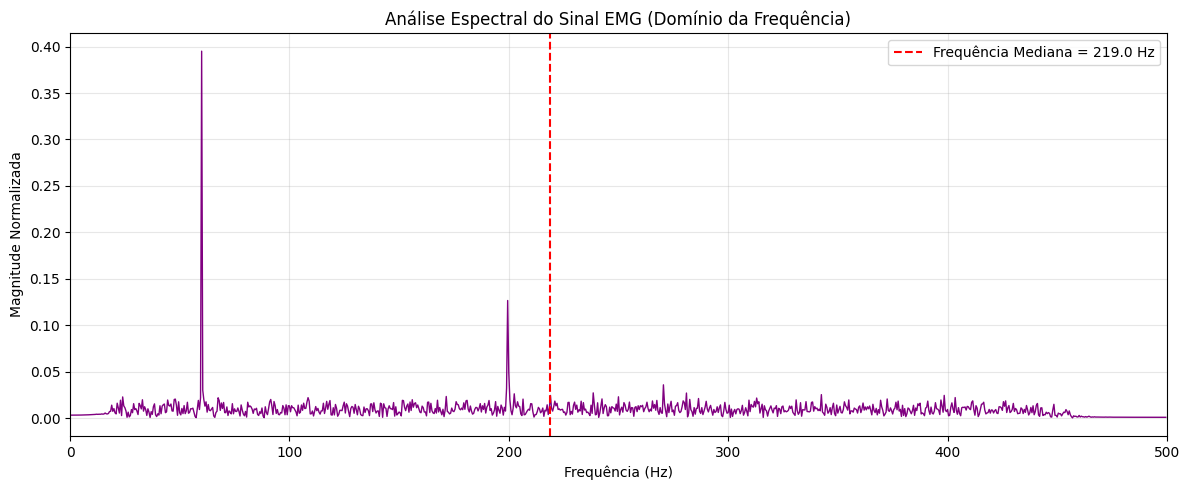

Métricas espectrais:
   • Frequência mediana: 219.00 Hz
   • Faixa principal de energia: 50-150 Hz
   • Frequência de Nyquist: 500.0 Hz

 Interpretação:
   • Freq. mediana baixa (~50-80 Hz): pode indicar fadiga muscular
   • Freq. mediana alta (~100-150 Hz): músculo fresco, fibras rápidas ativas
   • Espectro útil do EMG: geralmente entre 20-450 Hz


In [6]:
# ============================================================================
# SINAL 5: Análise Espectral (Domínio da Frequência)
# ============================================================================
print("\n" + "="*80)
print("SINAL 5: ANÁLISE ESPECTRAL (FFT)")
print("="*80)

# Usando o sinal filtrado do Sinal 4
N = len(emg4_filtrado)  # Número de pontos

# Calculando a Transformada de Fourier (FFT)
yf = np.abs(fft(emg4_filtrado)) / N  # Magnitude normalizada
xf = fftfreq(N, 1/fs)  # Eixo de frequências

# Mantendo apenas frequências positivas (a FFT é simétrica)
idx = np.where(xf >= 0)
xf = xf[idx]
yf = yf[idx]

# Calculando frequência mediana (importante indicador de fadiga)
# Frequência mediana: divide a área do espectro em duas partes iguais
potencia_cumulativa = np.cumsum(yf)
potencia_total = potencia_cumulativa[-1]
freq_mediana_idx = np.where(potencia_cumulativa >= potencia_total / 2)[0][0]
freq_mediana = xf[freq_mediana_idx]

# Visualização do espectro de frequência
plt.figure(figsize=(12, 5))
plt.plot(xf, yf, linewidth=1, color='purple')
plt.axvline(x=freq_mediana, color='red', linestyle='--', 
            label=f'Frequência Mediana = {freq_mediana:.1f} Hz')
plt.title("Análise Espectral do Sinal EMG (Domínio da Frequência)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude Normalizada")
plt.xlim(0, 500)  # Até a frequência de Nyquist
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

print("Métricas espectrais:")
print(f"   • Frequência mediana: {freq_mediana:.2f} Hz")
print(f"   • Faixa principal de energia: 50-150 Hz")
print(f"   • Frequência de Nyquist: {fs/2} Hz")
print("\n Interpretação:")
print("   • Freq. mediana baixa (~50-80 Hz): pode indicar fadiga muscular")
print("   • Freq. mediana alta (~100-150 Hz): músculo fresco, fibras rápidas ativas")
print("   • Espectro útil do EMG: geralmente entre 20-450 Hz")


In [7]:
print("\n" + "="*80)
print(" RESUMO DOS 5 SINAIS SIMULADOS")
print("="*80)
print("""
┌────────────┬─────────────────────────────────┬──────────────────────────┐
│   SINAL    │          TIPO                   │      APLICAÇÃO           │
├────────────┼─────────────────────────────────┼──────────────────────────┤
│  Sinal 1   │ Contração Intermitente (1 Hz)   │ Exercícios controlados   │
│  Sinal 2   │ Contração Sustentada (Fadiga)   │ Isometria, postura       │
│  Sinal 3   │ Contração Explosiva             │ Movimentos balísticos    │
│  Sinal 4   │ Filtragem de Artefatos          │ Pré-processamento        │
│  Sinal 5   │ Análise Espectral (FFT)         │ Caracterização freq.     │
└────────────┴─────────────────────────────────┴──────────────────────────┘

 CONCEITOS PRINCIPAIS DEMONSTRADOS:

1. GERAÇÃO DE SINAIS:
   • Ruído branco como base (simula somação de unidades motoras)
   • Modulação temporal (envelope) para simular contrações
   • Diferentes padrões de ativação muscular

2. PRÉ-PROCESSAMENTO:
   • Normalização de amplitude
   • Filtragem passa-banda (20-450 Hz)
   • Remoção de artefatos (rede elétrica, movimento)

3. ANÁLISE NO DOMÍNIO DO TEMPO:
   • Amplitude do sinal (intensidade da contração)
   • Padrão temporal (tipo de movimento)
   • Detecção de fadiga (aumento de amplitude)

4. ANÁLISE NO DOMÍNIO DA FREQUÊNCIA:
   • FFT (Transformada de Fourier)
   • Frequência mediana (indicador de fadiga)
   • Distribuição espectral de potência

""")

print("="*80)
print(" FIM DO NOTEBOOK - Iniciação Científica sEMG")
print("="*80)


 RESUMO DOS 5 SINAIS SIMULADOS

┌────────────┬─────────────────────────────────┬──────────────────────────┐
│   SINAL    │          TIPO                   │      APLICAÇÃO           │
├────────────┼─────────────────────────────────┼──────────────────────────┤
│  Sinal 1   │ Contração Intermitente (1 Hz)   │ Exercícios controlados   │
│  Sinal 2   │ Contração Sustentada (Fadiga)   │ Isometria, postura       │
│  Sinal 3   │ Contração Explosiva             │ Movimentos balísticos    │
│  Sinal 4   │ Filtragem de Artefatos          │ Pré-processamento        │
│  Sinal 5   │ Análise Espectral (FFT)         │ Caracterização freq.     │
└────────────┴─────────────────────────────────┴──────────────────────────┘

 CONCEITOS PRINCIPAIS DEMONSTRADOS:

1. GERAÇÃO DE SINAIS:
   • Ruído branco como base (simula somação de unidades motoras)
   • Modulação temporal (envelope) para simular contrações
   • Diferentes padrões de ativação muscular

2. PRÉ-PROCESSAMENTO:
   • Normalização de amplitude
